# Final Project: Classification
# Assignment 2

## Md. Rakibul Hasan 
## 2017831005

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data  = pd.read_csv('/content/drive/MyDrive/Final_Assignment/bank-full.csv',sep= ';')
train,test = train_test_split(data, test_size=0.33, random_state=42)


Checking the columns of each dataset

In [ ]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Hence, 'Subscribed' is the target variable.

Checking the data types of the variables

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30291 entries, 41031 to 15795
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        30291 non-null  int64 
 1   job        30291 non-null  object
 2   marital    30291 non-null  object
 3   education  30291 non-null  object
 4   default    30291 non-null  object
 5   balance    30291 non-null  int64 
 6   housing    30291 non-null  object
 7   loan       30291 non-null  object
 8   contact    30291 non-null  object
 9   day        30291 non-null  int64 
 10  month      30291 non-null  object
 11  duration   30291 non-null  int64 
 12  campaign   30291 non-null  int64 
 13  pdays      30291 non-null  int64 
 14  previous   30291 non-null  int64 
 15  poutcome   30291 non-null  object
 16  y          30291 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14920 entries, 3776 to 39098
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        14920 non-null  int64 
 1   job        14920 non-null  object
 2   marital    14920 non-null  object
 3   education  14920 non-null  object
 4   default    14920 non-null  object
 5   balance    14920 non-null  int64 
 6   housing    14920 non-null  object
 7   loan       14920 non-null  object
 8   contact    14920 non-null  object
 9   day        14920 non-null  int64 
 10  month      14920 non-null  object
 11  duration   14920 non-null  int64 
 12  campaign   14920 non-null  int64 
 13  pdays      14920 non-null  int64 
 14  previous   14920 non-null  int64 
 15  poutcome   14920 non-null  object
 16  y          14920 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.0+ MB


In [ ]:
train.shape

(30291, 17)

In [ ]:
test.shape

(14920, 17)

Hence, we can see that we have 16 similar features in the both the dataset and 'Subscribed' is the variable that is to be predicted

## Data Exploration

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41031,29,housemaid,single,tertiary,no,453,no,no,cellular,13,aug,126,2,-1,0,unknown,no
41950,55,services,married,secondary,no,0,no,no,cellular,22,oct,102,1,106,1,failure,no
39883,56,services,divorced,secondary,no,935,no,no,cellular,2,jun,136,1,96,3,failure,no
44938,47,housemaid,single,tertiary,no,3232,no,no,telephone,6,oct,541,1,204,3,failure,no
42103,39,technician,married,tertiary,no,508,no,no,cellular,2,nov,154,3,-1,0,unknown,no


In [ ]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3776,40,blue-collar,married,secondary,no,580,yes,no,unknown,16,may,192,1,-1,0,unknown,no
9928,47,services,single,secondary,no,3644,no,no,unknown,9,jun,83,2,-1,0,unknown,no
33409,25,student,single,tertiary,no,538,yes,no,cellular,20,apr,226,1,-1,0,unknown,no
31885,42,management,married,tertiary,no,1773,no,no,cellular,9,apr,311,1,336,1,failure,no
15738,56,management,married,tertiary,no,217,no,yes,cellular,21,jul,121,2,-1,0,unknown,no


In [ ]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#Frequency of 'subscribed'(y)
train['y'].value_counts()

0    26747
1     3544
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

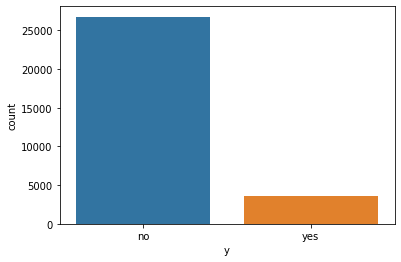

In [ ]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='y')

In [ ]:
#Normalizing the frequency table of 'Subscribed' variable
train['y'].value_counts(normalize=True)

no     0.883002
yes    0.116998
Name: y, dtype: float64

From the above analysis we can see that only 3,715 people out of 31,647 have subscribed which is roughly 12%. 

In [ ]:
#job vs subscribed
print(pd.crosstab(train['job'],train['y']))

y                no  yes
job                     
admin.         3056  416
blue-collar    6079  486
entrepreneur    904   83
housemaid       754   79
management     5425  870
retired        1190  344
self-employed   953  133
services       2536  249
student         446  176
technician     4523  552
unemployed      707  136
unknown         174   20


From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [ ]:
#Marital status vs subscribed
pd.crosstab(train['marital'], train['y'])

y,no,yes
marital,,
divorced,3033,421
married,16426,1841
single,7288,1282


In [ ]:
marital = pd.crosstab(train['marital'], train['y'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

y,no,yes
marital,,
divorced,0.878112,0.121888
married,0.899217,0.100783
single,0.850408,0.149592


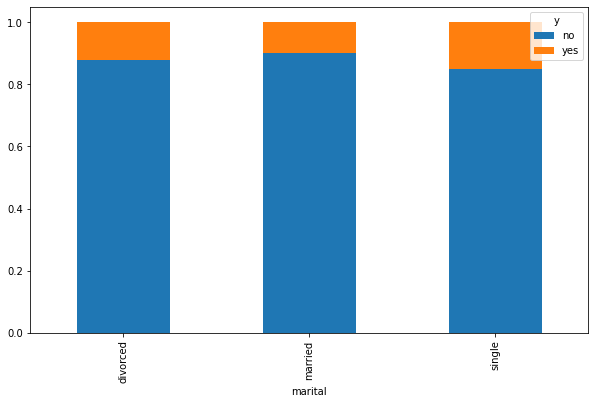

In [ ]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

In [ ]:
def replacement(dataset):
  dataset['job'].replace({'management' : 0,'technician' : 1, 'entrepreneur': 2,'blue-collar': 3, 'unknown' : 4,'retired' : 5 ,'admin.': 6,'services' : 7,
  'self-employed' : 8, 'unemployed' : 9, 'housemaid' : 10,'student' : 11 },inplace=True)
  dataset['loan'].replace({'no' : 0,'yes' : 1},inplace=True)
  dataset['contact'].replace({'unknown' : 0,'cellular' : 1, 'telephone': 2 },inplace=True)
  dataset['marital'].replace({'married' : 0,'single' : 1, 'divorced': 2 },inplace=True)
  dataset['education'].replace({'tertiary' : 0,'secondary' : 1, 'unknown': 2, 'primary': 3 },inplace=True)
  dataset['default'].replace({'no' : 0,'yes' : 1},inplace=True)
  dataset['housing'].replace({'no' : 0,'yes' : 1},inplace=True)
  dataset['month'].replace({'jan' : 0,'feb' : 1, 'mar': 2,'apr': 3, 'may' : 4,'jun' : 5 ,'jul': 6,'aug' : 7,
  'sep' : 8, 'oct' : 9, 'nov' : 10,'dec' : 11 },inplace=True)
  dataset['poutcome'].replace({'unknown' : 0,'failure' : 1, 'other': 2, 'success': 3 },inplace=True)
  dataset['y'].replace({'no' : 0,'yes' : 1},inplace=True)
  return dataset

In [ ]:
# Converting the target variables into 0s and 1s
train = replacement(train)
test = replacement(test)

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41031,29,10,1,0,0,453,0,0,1,13,7,126,2,-1,0,0,0
41950,55,7,0,1,0,0,0,0,1,22,9,102,1,106,1,1,0
39883,56,7,2,1,0,935,0,0,1,2,5,136,1,96,3,1,0
44938,47,10,1,0,0,3232,0,0,2,6,9,541,1,204,3,1,0
42103,39,1,0,0,0,508,0,0,1,2,10,154,3,-1,0,0,0


In [ ]:
#Correlation matrix
tc = train.corr()
tc

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.004363,-0.124562,0.197027,-0.018397,0.100389,-0.186408,-0.015750,0.093096,-0.007667,0.090671,-0.010367,0.001506,-0.021798,0.006428,0.016334,0.027066
job,0.004363,1.000000,0.025509,0.259568,-0.010331,-0.025428,-0.042513,-0.010681,0.000651,-0.029900,-0.060900,0.014097,-0.034066,0.001252,-0.005614,0.012492,0.023728
marital,-0.124562,0.025509,1.000000,-0.111552,0.014411,-0.029505,-0.011253,-0.018458,-0.011331,-0.009323,-0.043444,0.017276,-0.037019,0.024475,0.016632,0.025978,0.046517
education,0.197027,0.259568,-0.111552,1.000000,0.002512,-0.046602,0.043576,0.003250,-0.063514,-0.029751,-0.059475,-0.003368,0.005281,-0.011540,-0.024048,-0.046276,-0.060599
default,-0.018397,-0.010331,0.014411,0.002512,1.000000,-0.071445,-0.003941,0.076794,-0.019705,0.011250,0.021577,-0.009368,0.012618,-0.032116,-0.026553,-0.040934,-0.022044
balance,0.100389,-0.025428,-0.029505,-0.046602,-0.071445,1.000000,-0.065498,-0.085900,0.049372,0.002030,0.097886,0.026996,-0.023532,0.002972,0.022882,0.033815,0.052980
housing,-0.186408,-0.042513,-0.011253,0.043576,-0.003941,-0.065498,1.000000,0.041102,-0.200021,-0.032902,-0.174940,0.000967,-0.024550,0.126829,0.045859,0.005557,-0.139473
loan,-0.015750,-0.010681,-0.018458,0.003250,0.076794,-0.085900,0.041102,1.000000,-0.000452,0.018372,0.022420,-0.012675,0.011237,-0.022004,-0.012685,-0.044864,-0.067046
contact,0.093096,0.000651,-0.011331,-0.063514,-0.019705,0.049372,-0.200021,-0.000452,1.000000,0.040560,0.165684,0.006604,0.020771,0.210825,0.169427,0.221291,0.136015
day,-0.007667,-0.029900,-0.009323,-0.029751,0.011250,0.002030,-0.032902,0.018372,0.040560,1.000000,0.104148,-0.022335,0.160293,-0.094808,-0.064774,-0.075485,-0.023772


<AxesSubplot:>

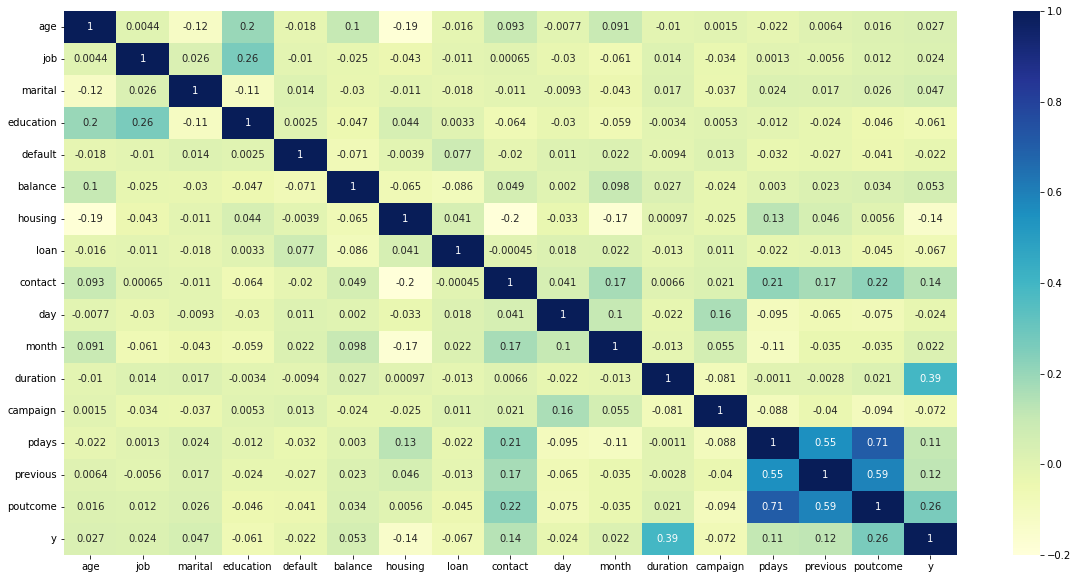

In [ ]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

## Model Building

In [ ]:
target = train['y']
train.drop('y', axis=1, inplace = True)
test_y = test['y']
test.drop('y',axis = 1, inplace = True)

In [ ]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3776,40,3,0,1,0,580,1,0,0,16,4,192,1,-1,0,0
9928,47,7,1,1,0,3644,0,0,0,9,5,83,2,-1,0,0
33409,25,11,1,0,0,538,1,0,1,20,3,226,1,-1,0,0
31885,42,0,0,0,0,1773,0,0,1,9,3,311,1,336,1,1
15738,56,0,0,0,0,217,0,1,1,21,6,121,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25573,39,1,0,1,0,3494,1,0,1,19,10,139,1,92,4,1
6395,58,3,0,1,0,-37,1,0,0,27,4,140,2,-1,0,0
24513,38,0,1,0,0,0,1,0,1,17,10,213,2,-1,0,0
34048,31,0,1,0,0,2915,0,0,1,30,3,228,1,86,1,1


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
normalizer = preprocessing.Normalizer()
scaler = MinMaxScaler()
#normalized_train_X = normalizer.fit_transform(train)
normalized_train_X = scaler.fit_transform(train)
#normalized_test_X = normalizer.transform(test)
normalized_test_X = scaler.transform(test)

In [ ]:
target.shape

(30291,)

In [ ]:
train.shape

(30291, 16)

In [ ]:
normalized_train_X
#normalized_test_X


array([[0.14285714, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.48051948, 0.63636364, 0.        , ..., 0.12270642, 0.01818182,
        0.33333333],
       [0.49350649, 0.63636364, 1.        , ..., 0.11123853, 0.05454545,
        0.33333333],
       ...,
       [0.20779221, 0.09090909, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19480519, 0.45454545, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25974026, 0.27272727, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state = 0, C = 10)  
classifier.fit(normalized_train_X, target)  

SVC(C=10, kernel='linear', random_state=0)

In [ ]:
predict = classifier.predict(normalized_test_X)

In [ ]:
predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

from sklearn.metrics import accuracy_score, classification_report   
score = accuracy_score(test_y, predict)  
print(score)  

0.8939678284182305


In [ ]:
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     13175
           1       0.69      0.17      0.28      1745

    accuracy                           0.89     14920
   macro avg       0.79      0.58      0.61     14920
weighted avg       0.88      0.89      0.86     14920

